# Practical Session 4
## Biomedical Signals and Images 
### ETRO: Deparment of Electronics and Informatics
### Vrije Universiteit Brussel

Evgenia Papavasileiou and Jef Vandemeulebroucke



<font color=blue>Students names: </font> <Br> Tanjil Hasan - 0586496 <br>Mahsa Alirezaee - 0574173 <Br>
<font color=blue>Academic Year </font>: 2021-2022

### Purpose
The purpose of this exercise session is to obtain insight into feature extraction techniques applied on medical image processing as well as processing of the extracted features. For more information on these concepts see the
related material on the course slides.

The jupyter notebook should be submitted as the report of each practical session by teams of <b>two</b> students. In colab you should download the notebook in the format *.ipynb and save it as a pdf version through print->save as pdf. Both the jupyter notebook and the pdf should be uploaded on canvas in a zip file before the deadline.The zip file should be named as Surname1Name1_Surname2Name2.zip. The <b>deadline</b> for the report submission is January 5th 2022, at 23.59. Any report sent after the deadline will not be graded.


### Required libraries
During this practical session, the following libraries will be used:

* Numpy 
* Simple ITK 
* Matplotlib
* Sklearn
* pandas

To import any external library, you need to import it using the **import** statement followed by the name of the library.

## importing libraries

In [1]:
import numpy as np
import pandas as pd 
import SimpleITK as sitk
import matplotlib.pyplot as plt

## Part 1: Feature Extraction
In the first part of this practical session you are given a CT image of a lung, together with the segmentation mask and you are asked to extract features belonging to two important groups of features; first order statistics and shape features.

###  Load the image
1. Download the DICOM image.
2. Use SimpleITK functions SimpleITK.ImageSeriesReader() with GetGDCMSeriesFileNames() to read the DICOM series by providing the whole path where the Dicom series is stored. Documentation can be found [here:](https://simpleitk.readthedocs.io/en/master/link_DicomSeriesReader_docs.html) <br>
3. Use function SimpleITK.ReadImage() to obtain the itk images by providing the obtained dicom series. 
4. Use function SimpleITK.GetArrayFromImage() to convert the itk image of the previous step into a numpy array.

*To see the documentation of a function you can type help(the name of a function). For example:<br>
help(SimpleITK.GetImageFromArray) returns <br>
GetImageFromArray(arr, isVector=None) <br>
    Get a SimpleITK Image from a numpy array. If isVector is True, then the Image will have a Vector pixel type, and the last dimension of the array will be considered the component index. By default when isVector is None, 4D images are automatically considered 3D vector images.*


#### Step 2

In [2]:
#CREATING a simpleitk reader instance  
reader = sitk.ImageSeriesReader()

#we obtained names of the files usuing the designated function from the path we stored
path = "LUNG"
dicom_names = reader.GetGDCMSeriesFileNames(path)
reader.SetFileNames(dicom_names)
image = reader.Execute()

#### Step 3

In [3]:
# we dervied images from the series 
lung = sitk.ReadImage(dicom_names)# we hakve to pass the name we get from the series usuing that GetGDCMSeriesFileNames function

print(f"above lung is a {lung.GetDimension()} D image")

above lung is a 3 D image


#### Step 4

In [4]:
numpy_array = sitk.GetArrayFromImage(lung)

In [5]:
numpy_array

array([[[-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        ...,
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -1024, -1024]],

       [[-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        ...,
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -1024, -1024]],

       [[-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        ...,
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -10

### Now load the mask
5. Download the mask.
6. Use SimpleITK function sitk.ReadImage() to read the mask by giving as input the whole path where the mask is stored. 
7. Convert the itk mask to a numpy array with function SimpleITK.GetArrayFromImage(). 

In [6]:
#reading mask from the directory 
mask = sitk.ReadImage("lung_mask.mhd")

num_array_mask_mhd = sitk.GetArrayFromImage(mask)

Note: You can find some examples of SimpleITK's functions [here.](http://simpleitk.github.io/SimpleITK-Notebooks/01_Image_Basics.html)
On that page it is mentioned that:
"The order of index and dimensions need careful attention during conversion.
ITK's Image class does not have a bracket operator. It has a GetPixel which takes an ITK Index object as an argument, which is an array ordered as (x,y,z). This is the convention that SimpleITK's Image class uses for the GetPixel method as well.
While in numpy, an array is indexed in the opposite order (z,y,x)."

To observe this, get the size of the itkimage resulting from function SimpleITK.ReadImage in step 3. To do this use function GetSize() <br>
Now get the size of the numpy image resulting from function SimpleITK.GetArrayFromImage in step 4.

In [7]:
lung.GetPixel(0, 0, 0)

-1024

In [8]:
lung.GetSize()

(512, 512, 134)

In [9]:
numpy_array.shape

(134, 512, 512)

### Visualize some slices of the CT image
In a 2X2 matplolib subplot visualize slices **72,77,82,84** <br>
Use function imshow and a gray colormap 

*Remember python's indexes start from zero*

In [10]:
z = 71
slice_72 = sitk.GetArrayFromImage(lung)[z,:,:]

z = 76
slice_77 = sitk.GetArrayFromImage(lung)[z,:,:]

z = 81
slice_82= sitk.GetArrayFromImage(lung)[z,:,:]

z= 83
slice_84= sitk.GetArrayFromImage(lung)[z,:,:]

Text(0.5, 1.0, 'Slice 84')

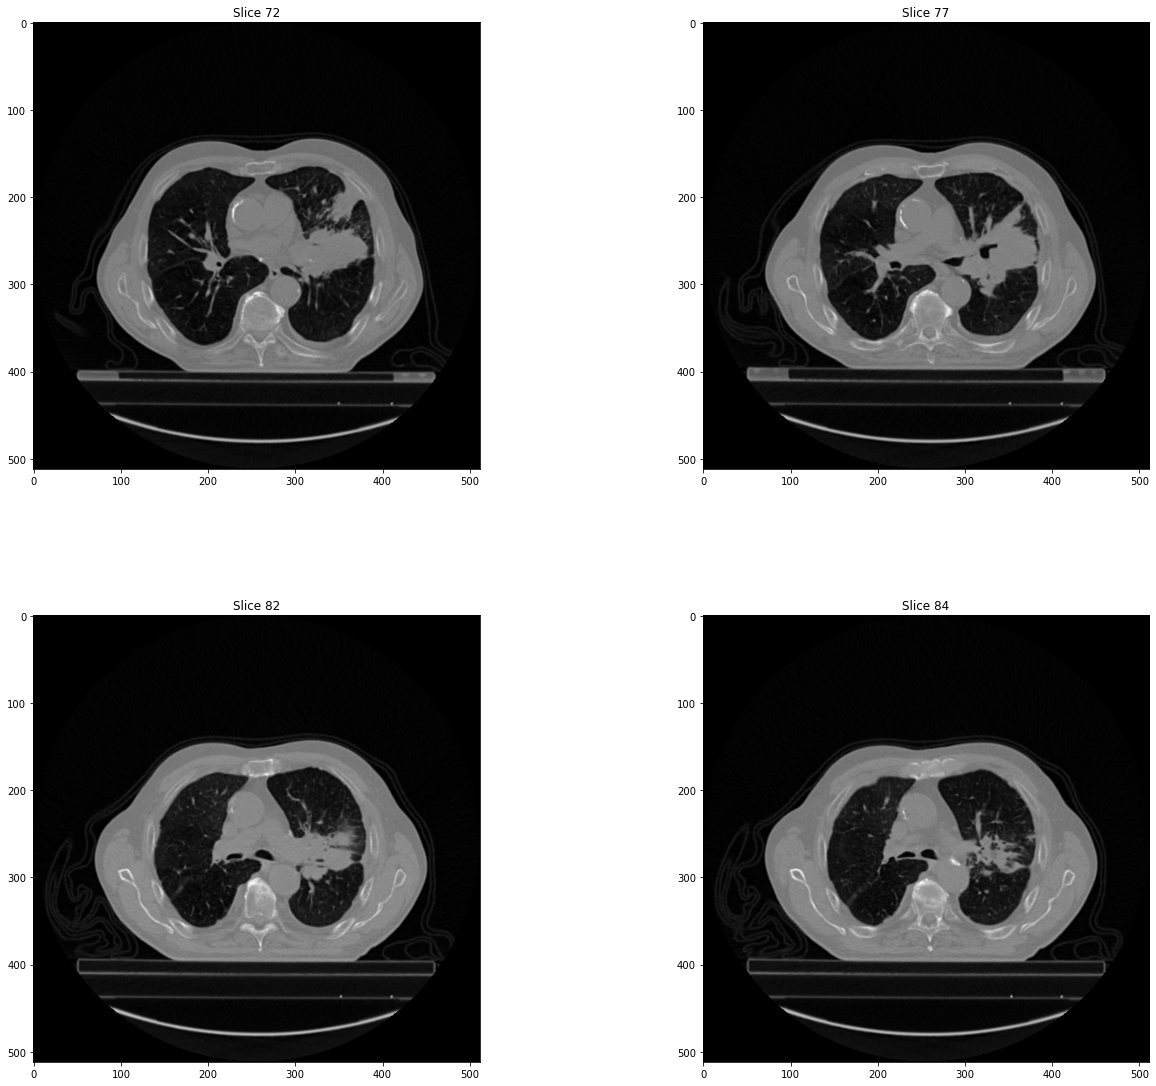

In [11]:
h,w = 2,2
plt.figure(figsize=(20,20));plt.subplots_adjust(hspace=0.2,wspace=0.5)


plt.subplot(h,w,1);plt.imshow(slice_72, cmap='gray');plt.title('Slice 72')
plt.subplot(h,w,2);plt.imshow(slice_77, cmap='gray');plt.title('Slice 77')
plt.subplot(h,w,3);plt.imshow(slice_82, cmap='gray');plt.title('Slice 82')
plt.subplot(h,w,4);plt.imshow(slice_84, cmap='gray');plt.title('Slice 84')

### Overlay with the masks
Overlay the above slices with the masks.
When plotting the masks, define a value for the parameter 'alpha' of function imshow() and use a different colormap.

Text(0.5, 1.0, 'Overlaying mask mhd with slice 84')

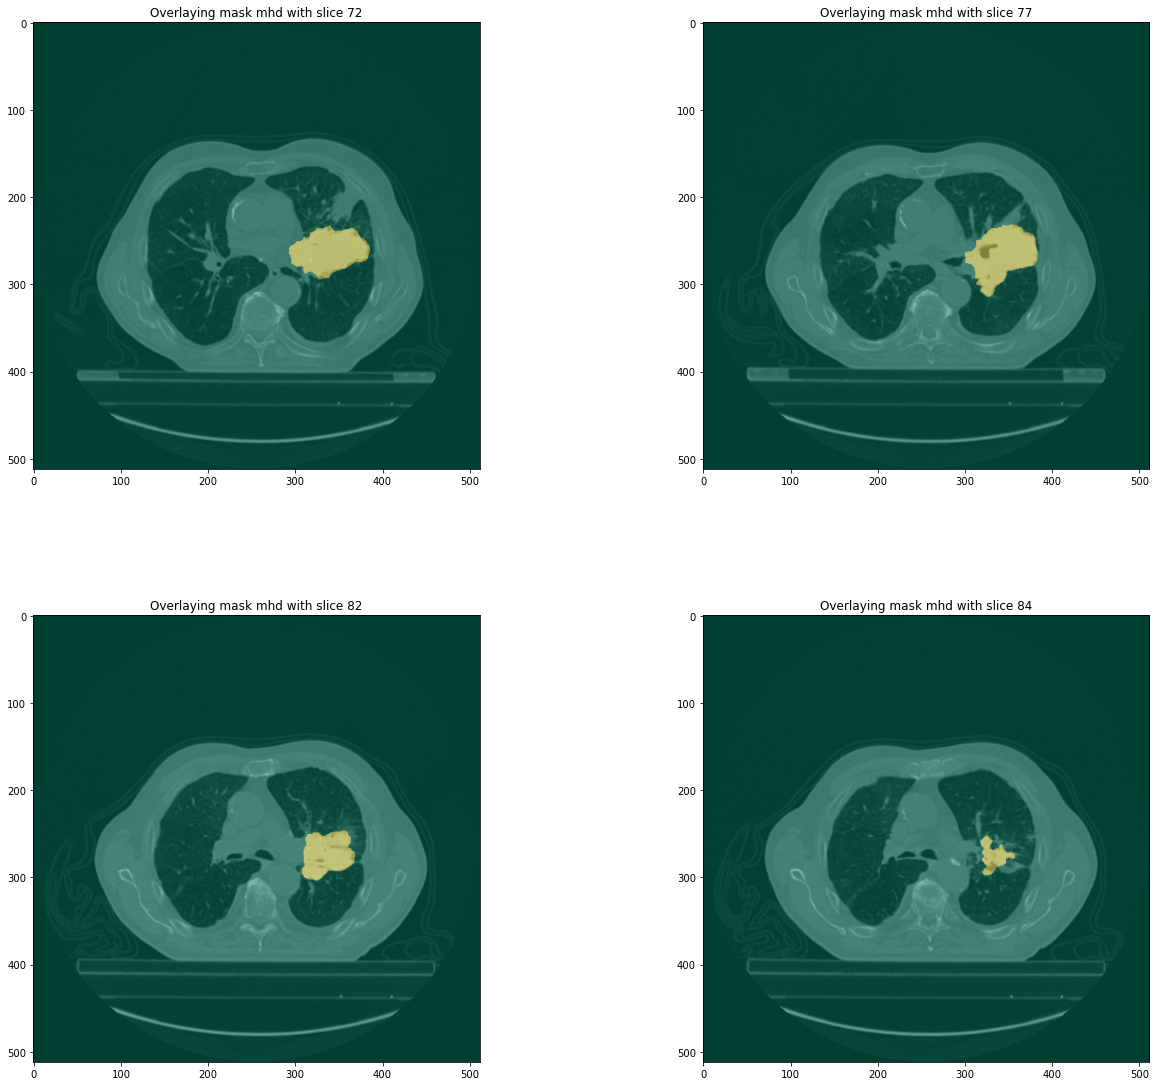

In [12]:
h,w = 2,2
plt.figure(figsize=(20,20));plt.subplots_adjust(hspace=0.2,wspace=0.5)


plt.subplot(h,w,1);plt.imshow(slice_72, cmap='gray');plt.imshow(num_array_mask_mhd[71,:,:],cmap='summer',alpha = 0.5)
plt.title("Overlaying mask mhd with slice 72")

plt.subplot(h,w,2);plt.imshow(slice_77, cmap='gray');plt.imshow(num_array_mask_mhd[76,:,:],cmap='summer',alpha = 0.5)
plt.title("Overlaying mask mhd with slice 77")

plt.subplot(h,w,3);plt.imshow(slice_82, cmap='gray');plt.imshow(num_array_mask_mhd[81,:,:],cmap='summer',alpha = 0.5)
plt.title("Overlaying mask mhd with slice 82")

plt.subplot(h,w,4);plt.imshow(slice_84, cmap='gray');plt.imshow(num_array_mask_mhd[83,:,:],cmap='summer',alpha = 0.5)
plt.title("Overlaying mask mhd with slice 84")

### Feature Extraction: First Order Statistics <br>
To begin with you are going to extract first order statistics, i.e. features that describe the distribution of voxel intensities within the image region of interest (ROI). <Br>
To obtain the ROI, take only the part of the image *where the mask has true labels, i.e. when mask==1*. Use function numpy.where() to get the coordinates and apply them to the numpy image. <br>
Convert the obtained image to type ['float'](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.astype.html).
This is necessary for the calculations that follow.


In [13]:
#using where to get the array of image containing masks trule labels 
ROI_coordinates = np.where(num_array_mask_mhd==1)

#implementing coordinates on the image 

image_roi = (numpy_array[:,:,:][ROI_coordinates]).astype('float')
image_roi

array([   3.,  -47.,  -90., ..., -596., -307.,  -59.])

Let $X$ be the set of $N_p$ voxels included in the ROI. Given the definitions of the features, calculate the values of the features in the ROI you obtained in the previous step.<br>
Note: you can use existing numpy functions to calculate some features. For example, numpy.mean to calculate feature 'average gray level intesity'. 

#### 1. Minimum
The minimum gray level intensity within the ROI.

In [14]:
np.min(image_roi)

-1021.0

#### 2. Maximum
The maximum gray level intesity within the ROI. <br>


In [15]:
np.max(image_roi)

1040.0

#### 3. Range
The range of gray values in the ROI.<br>
$Range=max(X(i))-min(X(i))$

In [16]:
𝑅𝑎𝑛𝑔𝑒=np.max(image_roi)-np.min(image_roi)
𝑅𝑎𝑛𝑔𝑒

2061.0

#### 4. Average
The average gray level intesity within the ROI. <br>
$Mean=\frac{1}{N_p}\sum^{N_p}_{i=1}X(i)$

In [20]:
mean = np.sum(image_roi)/len(image_roi)
mean

-62.91303788866646

#### 5. Energy
Energy is a measure of the magnitude of voxel values in an image. <br>

$Energy=\sum^{N}_{i=1}(X(i)+c)^2$

$c$ is a parameter which is used to shift the intensities to prevent negative values in X.<br>

When using CT images a good practice is to use the value $1024$. Can you explain why? <br>
<font color=blue> Your answer here:<Br></font>

Energy, in image processing , in fact declares the diffrences of quality between the pixels of the image being processed. Az is mentioned we use the c parameter to prevent the negative values of X, and we know that a CT image size is from 255 in 255 to 1024 in 1024 pixels, Which in spatial scale, VOXEL represents the pixels. So the amount 1024 will make us sure that even if we need to study all segments of a large image(not only a special area as in ROI), we will not have any negative value of X after shifting the intensities.

In [17]:
energy = np.sum(np.square(image_roi+1024))
energy

52509710748.0

#### 6. Root Mean Square
The squared root of the mean of the squared intensities in the ROI.<br>
$RMS=\sqrt{\frac{1}{N_p}\sum^{N_p}_{i=1}(X(i)+c)^2}$

In [22]:
rms =  np.sqrt(np.sum(np.square(image_roi+1024))/len(image_roi))
rms

982.0302345956065

#### 7. Standard Deviation

In [23]:
np.std(image_roi)

201.73059490198818

### Feature Extraction: Shape Features

In this exercise you are going to extract some shape features which are descriptors of the three-dimensional size and shape of the ROI and they are independent from the gray level intensity distribution in the ROI. Calculate the following features

#### 1. Volume
$Volume\approx N_p * V_i$ <br>
You can approximate volume by multiplying the total number of pixels with the volume of each pixel. To do this you need to get the size of a pixel by using the function GetSpacing(). The spacing is the geometric distance between image samples along each dimension.<br>

In [24]:
#https://stackoverflow.com/questions/67652500/calculating-volume-of-3d-model-in-python
#got the theory from there 


pixel_size = lung.GetSpacing()

volume  = np.prod(pixel_size)*len(image_roi)
volume

155779.83856201172

#### 3. Surface Area to Volume ratio
Given that the surface area is 23501.6761259, calculate the surface area to volume ratio. <br>
This feature gives an insight of the shape of the ROI. A lower value indicates a more compact (sphere-like) shape. 

In [25]:
sur_area = 23501.6761259
f"Surface Area to Volume ratio {sur_area / volume}"

'Surface Area to Volume ratio 0.15086468404924314'

#### 4. Compactness 
 a measure of how compact the shape of the tumor is relative to a sphere (most compact). It is therefore correlated to Sphericity and redundant. It is provided here for completeness. The value range is [0,1/(6pi)], where a value of 16π indicates a perfect sphere.<br>
$Compactness=\frac{Volume}{\sqrt{\pi \cdot Surface^3}}$

In [26]:
compactness = volume / np.sqrt(np.pi * np.power(sur_area,3))
compactness

0.024394282987816377

#### 5. Shperical Disproportion
Spherical Disproportion is the ratio of the surface area of the tumor region to the surface area of a sphere with the same volume as the tumor region, and by definition, the inverse of Sphericity. Therefore, the value range is greater than 1 with a value of 1 indicating a perfect sphere. <br>
$Spherical Disporportion=\frac{Surface}{4\cdot\pi\cdot R^2}$
where $R$ the radius of a sphere with volume equal to the volume of the tumor, i.e. $R=\sqrt[3]{\frac{3\cdot Volume}{4 \cdot \pi}}$

In [27]:
R = np.cbrt((3 * volume)/(4*np.pi))
Spherical_Disporportion = sur_area / (4* np.pi*R*R)
Spherical_Disporportion

1.6785742100053984

## Part 2: Feature Visualization
In this exercise you are given the values of the above features extracted from the CT images of 122 patients. Download the file features.csv that contains all the features extracted from these patients. 
- Load the features in pandas dataframe using function [pd.read_csv()]( https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Define ';' as the delimeter. 
- Print the first 10 rows of the dataframe using function [head()]( https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)
- Drop the last column of the frame using function [drop]( https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) The last column of this dataframe contains the labels assigned to each lesion found in the CT scan, i.e. benign (no cancer) or malignant. 


In [70]:
df = pd.read_csv("features.csv",delimiter=';')

In [71]:
df.head(2)

,min,max,range,average,energy,rms,std,volume,surfacde,surfaceovervolume,sphercal disporportion,compactness,label
0,-1024,615,1639,-49.124253,7183072911,239.522345,234.430718,358532.54670,35689.207210,0.099542,1.462291,0.030002,0
1,-961,230,1191,-100.581455,868119204,267.731628,248.120124,34680.90216,9287.689178,0.267804,1.805912,0.021860,0


In [72]:
#printing 10 rows  
df.head(10)

,min,max,range,average,energy,rms,std,volume,surfacde,surfaceovervolume,sphercal disporportion,compactness,label
0,-1024,615,1639,-49.124253,7183072911,239.522345,234.430718,358532.54670,35689.207210,0.099542,1.462291,0.030002,0
1,-961,230,1191,-100.581455,868119204,267.731628,248.120124,34680.90216,9287.689178,0.267804,1.805912,0.021860,0
2,-994,607,1601,-47.559032,863753559,171.308006,164.573908,84208.48846,19128.126360,0.227152,2.058817,0.017959,0
3,-1024,2621,3645,2.184743,1016158941,186.989867,186.977103,83221.56539,19715.454000,0.236903,2.138777,0.016961,0
4,-966,488,1454,-66.045163,829535347,241.757717,232.561455,40642.89029,8104.716252,0.199413,1.417742,0.031427,0
5,-1024,250,1274,-0.368995,977138398,168.774045,168.773641,98232.48845,22623.867650,0.230309,2.197418,0.016287,0
6,-1022,278,1300,-202.641291,3124963798,335.461261,267.340167,79518.94740,15885.806820,0.199774,1.776416,0.022407,0
7,-1024,348,1372,-196.001238,4705189658,391.527095,338.935069,87894.93938,14212.063330,0.161694,1.486610,0.029269,0
8,-999,1062,2061,-54.506685,7088061300,306.172019,301.281142,216524.40380,26208.432130,0.121041,1.502977,0.028792,0
9,-1024,601,1625,-184.827145,5508300763,378.702329,330.536504,109984.64950,17154.506130,0.155972,1.545276,0.027618,0


In [73]:
df_=df.drop(columns=['label'])
df_

,min,max,range,average,energy,rms,std,volume,surfacde,surfaceovervolume,sphercal disporportion,compactness
0,-1024,615,1639,-49.124253,7183072911,239.522345,234.430718,358532.546700,35689.207210,0.099542,1.462291,0.030002
1,-961,230,1191,-100.581455,868119204,267.731628,248.120124,34680.902160,9287.689178,0.267804,1.805912,0.021860
2,-994,607,1601,-47.559032,863753559,171.308006,164.573908,84208.488460,19128.126360,0.227152,2.058817,0.017959
3,-1024,2621,3645,2.184743,1016158941,186.989867,186.977103,83221.565390,19715.454000,0.236903,2.138777,0.016961
4,-966,488,1454,-66.045163,829535347,241.757717,232.561455,40642.890290,8104.716252,0.199413,1.417742,0.031427
...,...,...,...,...,...,...,...,...,...,...,...,...
117,-797,119,916,-77.695455,38618875,187.371471,170.503620,3147.125244,1607.706968,0.510849,1.548033,0.027544
118,-1012,980,1992,10.410356,192186202,93.268234,92.685425,63208.580020,21199.169190,0.335384,2.762596,0.011554
119,-807,90,897,-356.587379,76882444,431.981335,243.830505,1178.741455,759.671625,0.644477,1.407763,0.031762
120,-826,100,926,-119.302579,48910627,220.278114,185.173816,2883.911133,1319.967901,0.457701,1.347177,0.033928


Normalize your features in the range $[0,1]$. A normalized feature is obtained like this <br>$Normalized \, Feature=\frac{original \, Feature-min(Feature)}{max(Feature)-min(Feature))}$ <br>
However, using scikit-learn you can do that with  [this function]( https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [74]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler(feature_range=(0,1))
normalizer.fit(df)
normalized_data = normalizer.transform(df)
normalized_data

array([[0.        , 0.18242344, 0.24868217, ..., 0.13567252, 0.68976912,
        0.        ],
       [0.15      , 0.05426099, 0.10976744, ..., 0.33977194, 0.3996299 ,
        0.        ],
       [0.07142857, 0.17976032, 0.23689922, ..., 0.48998872, 0.26059142,
        0.        ],
       ...,
       [0.51666667, 0.00765646, 0.01860465, ..., 0.10328467, 0.75248568,
        1.        ],
       [0.47142857, 0.01098535, 0.0275969 , ..., 0.06729892, 0.82969199,
        1.        ],
       [0.18333333, 0.01131824, 0.06542636, ..., 0.1716458 , 0.62662645,
        1.        ]])

In [75]:
nomalized_df = pd.DataFrame(normalized_data, columns=df.keys())
nomalized_df

,min,max,range,average,energy,rms,std,volume,surfacde,surfaceovervolume,sphercal disporportion,compactness,label
0,0.000000,0.182423,0.248682,0.807346,1.000000,0.302702,0.620971,0.542413,0.733007,0.043238,0.135673,0.689769,0.0
1,0.150000,0.054261,0.109767,0.732371,0.119012,0.349388,0.666168,0.051161,0.180696,0.319760,0.339772,0.399630,0.0
2,0.071429,0.179760,0.236899,0.809627,0.118403,0.189809,0.390332,0.126290,0.386554,0.252952,0.489989,0.260591,0.0
3,0.000000,0.850200,0.870698,0.882106,0.139664,0.215762,0.464299,0.124793,0.398841,0.268978,0.537482,0.225040,0.0
4,0.138095,0.140146,0.191318,0.782692,0.113629,0.306402,0.614799,0.060205,0.155949,0.207366,0.109212,0.740556,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0.540476,0.017310,0.024496,0.765717,0.003290,0.216394,0.409910,0.003327,0.020033,0.719182,0.186600,0.602184,1.0
118,0.028571,0.303928,0.358140,0.894091,0.024713,0.060655,0.152986,0.094435,0.429880,0.430822,0.908009,0.032346,1.0
119,0.516667,0.007656,0.018605,0.359360,0.008628,0.621218,0.652005,0.000342,0.002293,0.938786,0.103285,0.752486,1.0
120,0.471429,0.010985,0.027597,0.705094,0.004725,0.270854,0.458345,0.002928,0.014014,0.631837,0.067299,0.829692,1.0


Get two sets of datasets; one where the label is benign (benignData) and one where the label is malignant (MalignantData)

In [76]:
#now time to get two datasets
benignData = nomalized_df.loc[nomalized_df['label']==0]#.reset_index(drop=True)

MalignantData = nomalized_df.loc[nomalized_df['label']==1]#.reset_index(drop=True)

In [87]:
benignData.head(3)

,min,max,range,average,energy,rms,std,volume,surfacde,surfaceovervolume,sphercal disporportion,compactness,label
0,0.000000,0.182423,0.248682,0.807346,1.000000,0.302702,0.620971,0.542413,0.733007,0.043238,0.135673,0.689769,0.0
1,0.150000,0.054261,0.109767,0.732371,0.119012,0.349388,0.666168,0.051161,0.180696,0.319760,0.339772,0.399630,0.0
2,0.071429,0.179760,0.236899,0.809627,0.118403,0.189809,0.390332,0.126290,0.386554,0.252952,0.489989,0.260591,0.0


In [78]:
MalignantData.head(3)

,min,max,range,average,energy,rms,std,volume,surfacde,surfaceovervolume,sphercal disporportion,compactness,label
11,0.369048,0.064581,0.090853,0.729380,0.079071,0.359726,0.685673,0.032222,0.093439,0.258494,0.062822,0.839911,1.0
12,0.033333,0.349867,0.400310,0.837791,0.449567,0.397962,0.823381,0.157897,0.383226,0.176416,0.313620,0.429013,1.0
14,0.726190,0.185752,0.157209,0.880921,0.010209,0.090968,0.215356,0.029329,0.148356,0.506748,0.545380,0.219447,1.0


Print the mean and standard deviation of all the features of the benign and malignant datasets separately

In [79]:
#printing the mean and std of benignData
benignData[['average','std']]

,average,std
0,0.807346,0.620971
1,0.732371,0.666168
2,0.809627,0.390332
3,0.882106,0.464299
4,0.782692,0.614799
...,...,...
106,0.864614,0.419428
109,0.855796,0.330357
110,0.915814,0.376412
112,0.866264,0.255034


In [80]:
#printing the mean and std of MalignantData
MalignantData[['average','std']]

,average,std
11,0.729380,0.685673
12,0.837791,0.823381
14,0.880921,0.215356
16,0.699806,0.618695
17,0.936112,0.680041
18,0.582905,0.615844
22,0.724115,0.656539
24,0.878155,0.158763
27,0.519319,0.681986
29,0.881061,0.250837


Use matplotlib's [violin plot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.violinplot.html) to plot the distribution of the first feature in the benign and the malignant dataset. 
You can find an example [here](https://www.tutorialspoint.com/matplotlib/matplotlib_violin_plot.htm)

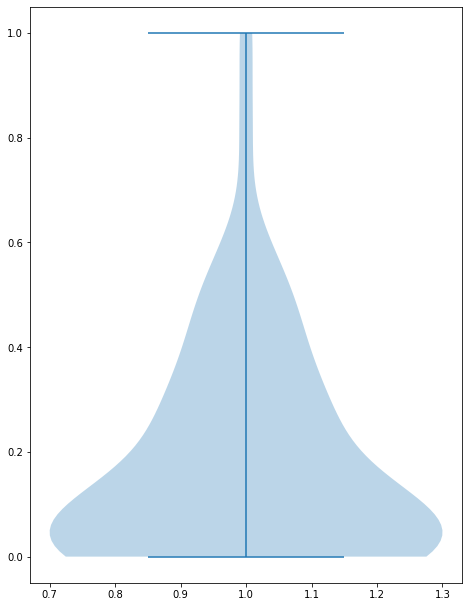

In [81]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,2])
bp = ax.violinplot(benignData['min'],widths=0.6)
plt.show()

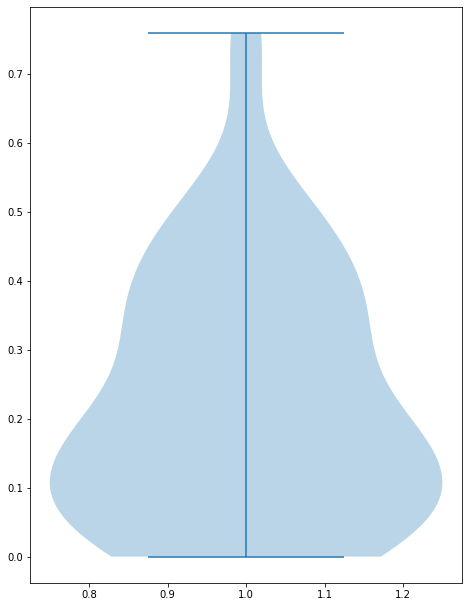

In [82]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,2])
bp = ax.violinplot(MalignantData['min'])
plt.show()

Plot the boxplots of the benign and malignant datasets in two separate graphs. A boxplot shows the distribution of a feature using its quartiles. To do this you can use function pyplot.boxplot(). 

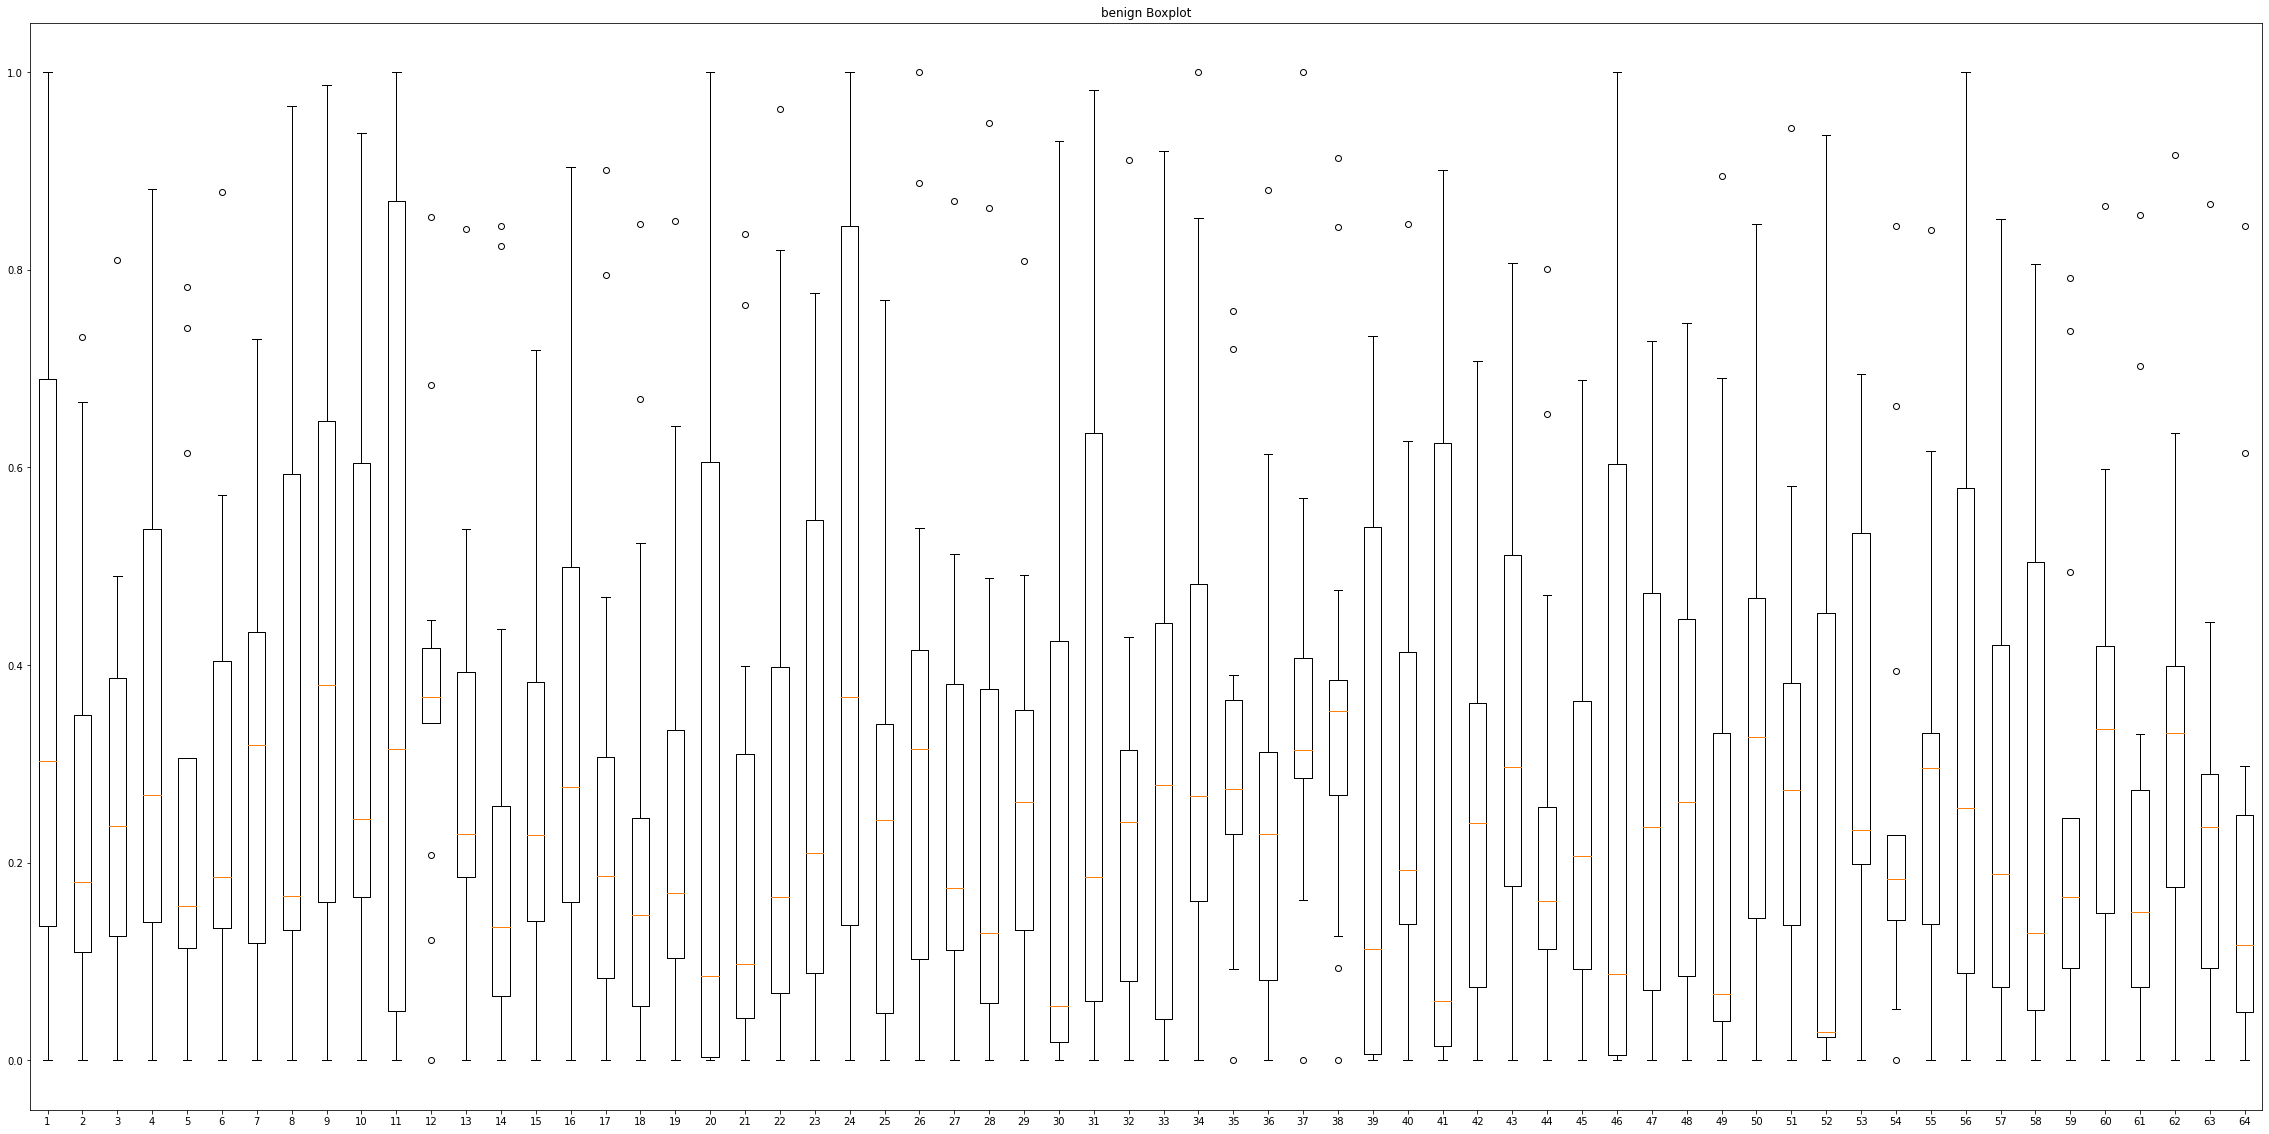

In [85]:
import matplotlib.pyplot as plt


#benign bocplotting 
plt.figure(figsize=(40,20))

# Create the boxplot
plt.boxplot(benignData)
plt.title('benign Boxplot')
plt.show()

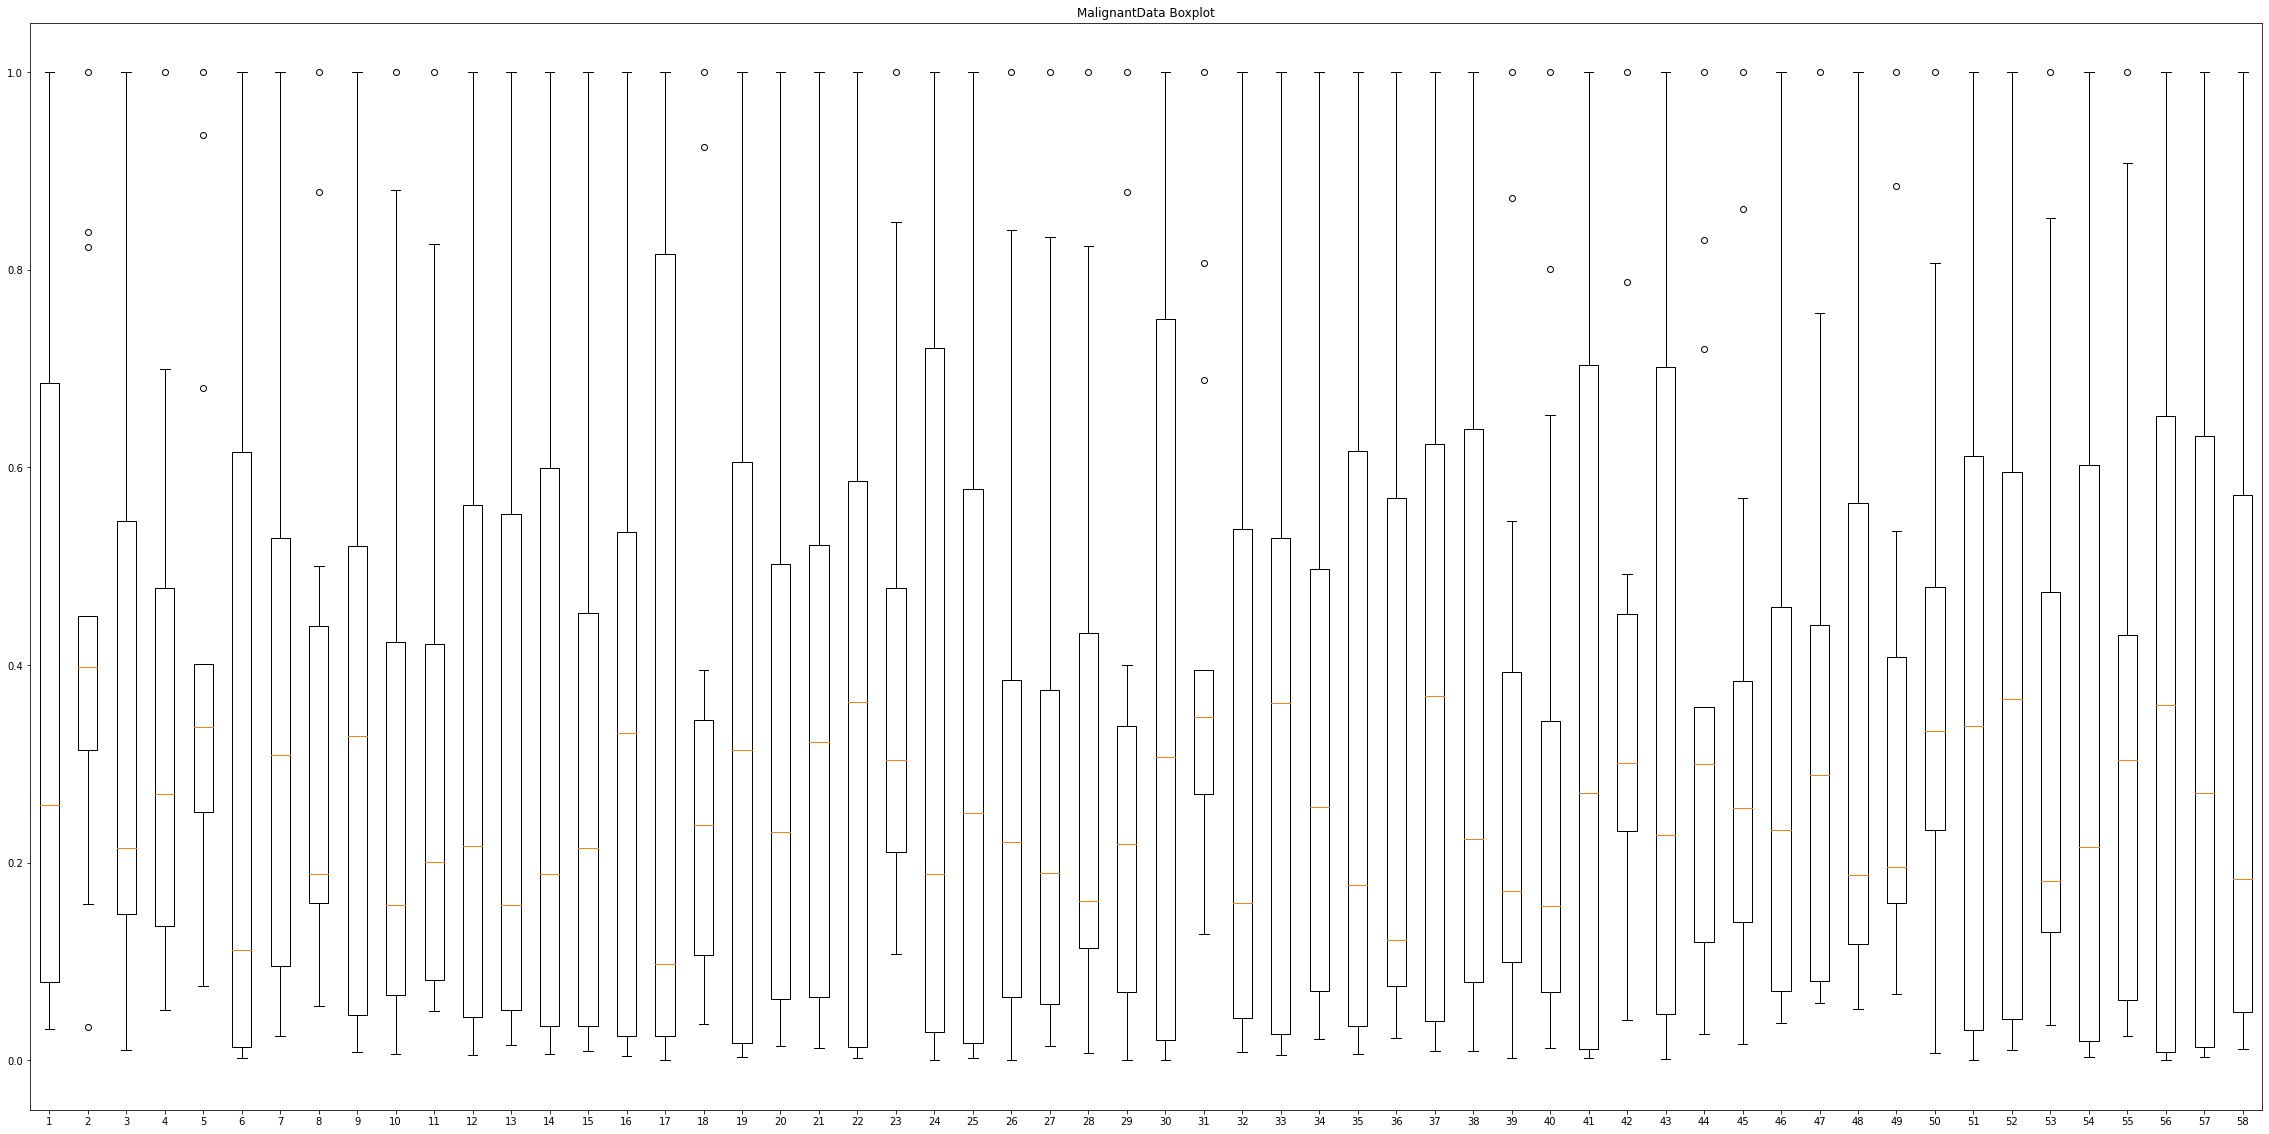

In [86]:
#MalignantData boxplotting 
 
plt.figure(figsize=(40,20))

# Create the boxplot
plt.boxplot(MalignantData)
plt.title('MalignantData Boxplot')
plt.show()

Plot the histogram of the feature surface over volume of the benign and malignant datasets in one graph. The histogram shows the distribution of a single feature. To do this you can use function pyplot.hist.  

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


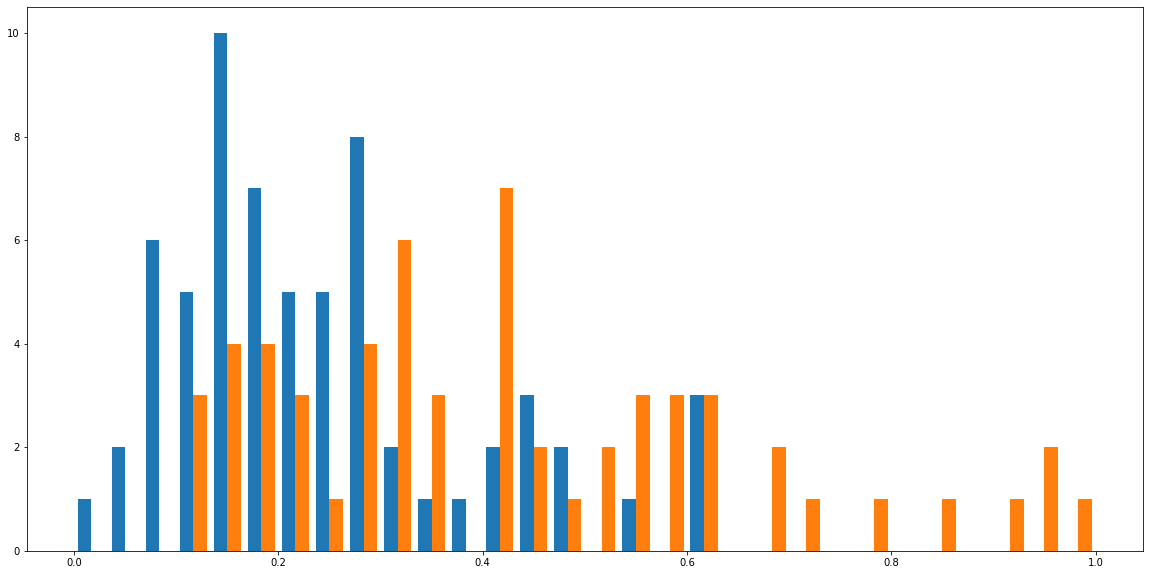

In [99]:
plt.figure(figsize=(20,10))
plt.hist([np.asarray(benignData['surfaceovervolume']).ravel(),np.asarray(MalignantData['surfaceovervolume']).ravel()],bins=30)
plt.show()

Finally, plot in a 2X2 figure the scatter plots of the following combinations of features:
- min and rms
- max and range
- range and surface over volume
- volume and surface

A scatterplot shows the relation between two features.

In [100]:
df_.head(3)

,min,max,range,average,energy,rms,std,volume,surfacde,surfaceovervolume,sphercal disporportion,compactness
0,-1024,615,1639,-49.124253,7183072911,239.522345,234.430718,358532.54670,35689.207210,0.099542,1.462291,0.030002
1,-961,230,1191,-100.581455,868119204,267.731628,248.120124,34680.90216,9287.689178,0.267804,1.805912,0.021860
2,-994,607,1601,-47.559032,863753559,171.308006,164.573908,84208.48846,19128.126360,0.227152,2.058817,0.017959


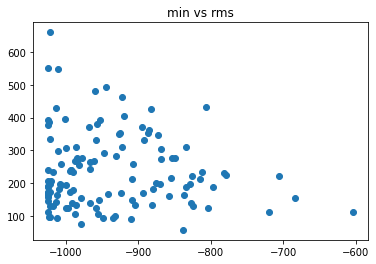

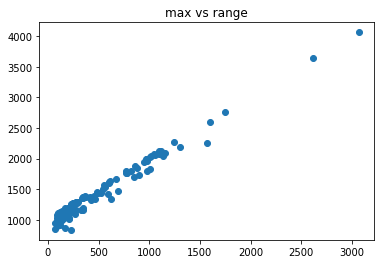

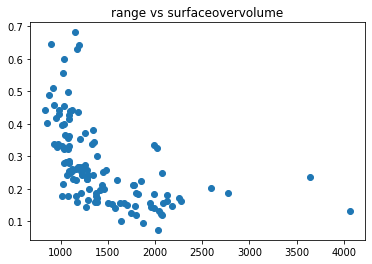

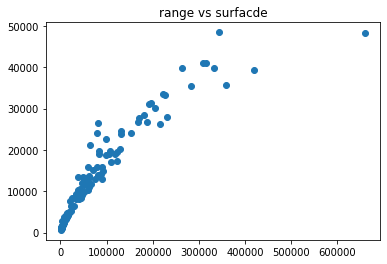

In [103]:
plt.scatter(df_['min'],df_['rms'],marker='o');plt.title('min vs rms')
plt.show()

plt.scatter(df_['max'],df_['range'],marker='o');plt.title('max vs range')
plt.show()

plt.scatter(df_['range'],df_['surfaceovervolume'],marker='o');plt.title('range vs surfaceovervolume')
plt.show()

plt.scatter(df_['volume'],df_['surfacde'],marker='o');plt.title('range vs surfacde')
plt.show()

Describe the relationships you see between the features

<font color=blue> Your answer here: </font>

## Part 3: A simple classifier

Take the features resulting from dropping the last column of the dataframe in the beginning of part 2. This is the set of features describing the ROIs of the 122 patients. The dropped column is the label assigned to the ROI.<br>
In this exercise you will train a classifier with a portion of the features' set and use it to predict the label of an unseen set of features
1. Divide your dataset in training and testing parts so that 70% of the dataset is a training set and 30% a test set. (use random state=40). https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
2. Normalize the training set and apply the normalization on the test set. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler
3. Use the normalized training set to train an SVM classifier and predict on the unseen testing set. Use the default values of the classifier found [here]( https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
4. Calculate the score of your classifier using [this function](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.score)

In [104]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder as le

In [107]:
df.head(3)

,min,max,range,average,energy,rms,std,volume,surfacde,surfaceovervolume,sphercal disporportion,compactness,label
0,-1024,615,1639,-49.124253,7183072911,239.522345,234.430718,358532.54670,35689.207210,0.099542,1.462291,0.030002,0
1,-961,230,1191,-100.581455,868119204,267.731628,248.120124,34680.90216,9287.689178,0.267804,1.805912,0.021860,0
2,-994,607,1601,-47.559032,863753559,171.308006,164.573908,84208.48846,19128.126360,0.227152,2.058817,0.017959,0


In [108]:
#splitted the data into train and test
train,test = train_test_split(df,test_size=0.3, random_state=40, shuffle=True)

[['min','max','range','average','energy','rms','std','volume','surfacde','surfaceovervolume','sphercal disporportion','compactness']]

In [109]:
#normalizing train dataset without target feature 'label encoder'
normalizer = MinMaxScaler(feature_range=(0,1))
normalizer.fit(train)
normalized_train_data = normalizer.transform(train)
normalized_train_data

array([[0.00238095, 0.05426099, 0.12899225, ..., 0.1828093 , 0.61366174,
        0.        ],
       [0.58333333, 0.20972037, 0.19813953, ..., 0.09429064, 0.7748919 ,
        0.        ],
       [0.49761905, 0.09221039, 0.09984496, ..., 0.05178337, 0.86826375,
        1.        ],
       ...,
       [0.        , 0.09354194, 0.16589147, ..., 0.13825565, 0.68983323,
        0.        ],
       [0.19761905, 0.1424767 , 0.18573643, ..., 0.13923661, 0.68805381,
        0.        ],
       [0.03809524, 0.10153129, 0.16837209, ..., 0.14391775, 0.6796291 ,
        0.        ]])

In [110]:
#normalizing test dataset without target feature 'label encoder'
normalizer = MinMaxScaler(feature_range=(0,1))
normalizer.fit(test)
normalized_test_data = normalizer.transform(test)
normalized_test_data

array([[1.        , 0.01750151, 0.        , 0.8074149 , 0.        ,
        0.16820045, 0.35321231, 0.0064133 , 0.02003332, 0.69551547,
        0.2163744 , 0.58118814, 1.        ],
       [0.00881057, 0.0042245 , 0.10961123, 0.        , 0.2037861 ,
        1.        , 0.73384376, 0.01137362, 0.03121202, 0.57325522,
        0.21584434, 0.58195927, 0.        ],
       [0.66960352, 0.03439952, 0.05561555, 0.53053606, 0.04807905,
        0.44841549, 0.58854683, 0.01140306, 0.0264871 , 0.48870324,
        0.10216196, 0.77262576, 1.        ],
       [0.18502203, 0.6065178 , 0.62688985, 0.98708915, 0.32461572,
        0.28763462, 0.66650557, 0.14536086, 0.25083107, 0.22973489,
        0.4648576 , 0.30252893, 1.        ],
       [0.30837004, 0.0090525 , 0.07721382, 0.84409222, 0.02676609,
        0.10037638, 0.23137924, 0.04664202, 0.08613312, 0.28769933,
        0.18092165, 0.63495911, 1.        ],
       [0.34801762, 0.        , 0.06425486, 0.37913363, 0.14263541,
        0.70371664, 1.     

In [113]:
nomalized_train_df = pd.DataFrame(normalized_train_data, columns=df.keys())
normalized_test_df = pd.DataFrame(normalized_test_data, columns=df.keys())

In [114]:
x_train=nomalized_train_df[['energy','volume','surfacde','sphercal disporportion','compactness']]
y_train = nomalized_train_df['label'].values

x_test = normalized_test_df[['energy','volume','surfacde','sphercal disporportion','compactness']]
y_test = normalized_test_df['label'].values

In [115]:
#Training SVM Model
classification_on_nomalized= SVC(kernel='rbf', class_weight='balanced')
classification_on_nomalized.fit(x_train,y_train)

SVC(class_weight='balanced')

In [116]:
print(f"Training Status\n\t correctly Fitted: {0==classification_on_nomalized.fit_status_}\n\t intercept: {classification_on_nomalized.intercept_}\n")

Training Status
	 correctly Fitted: True
	 intercept: [-0.3214643]



In [119]:
y_predict = classification_on_nomalized.predict(x_test)
y_predict

array([1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 0.])

In [121]:
print(f"Score : {classification_on_nomalized.score(x_test,y_test)}")

Score : 0.7567567567567568


In [122]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predict)
accuracy = float(cm.diagonal().sum())/len(y_test)

print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.7567567567567568
